# U21EC019
# Arpit Gandhi

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [10]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


In [11]:
# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(-1, RESHAPED)
X_test = X_test.reshape(-1, RESHAPED) 
print(X_train.shape, Y_train.shape)

(60000, 784) (60000,)


In [12]:
# Data is converted into float32 to use 32-bit precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 
# Normalizing the input to be within the range [0,1]; intensity of each pixel is divided by 255, the maximum intensity value
X_train /= 255
X_test /= 255

In [13]:
# For PCA

def calc(data):
    mean = np.mean(data, axis=0)
    data_centered = data - mean
    return data_centered, mean

X_train_centered, X_train_mean = calc(X_train)
X_test_centered, _ = calc(X_test)
cov_mat = np.cov(X_train_centered, rowvar=False)
eigenvals, eigenvects = np.linalg.eigh(cov_mat)
# print(eigenvals, len(eigenvals), type(eigenvals))
# print(eigenvects, len(eigenvects))

# sorting eigenvalues in descending order
sorted_indices = np.argsort(eigenvals)[::-1]
# print(sorted_indices)
eigenvals = eigenvals[sorted_indices]
eigenvects = eigenvects[:, sorted_indices]
eigenvects_k = eigenvects[:, :2]
X_train_pca = np.dot(X_train_centered, eigenvects_k)
X_test_pca = np.dot(X_test_centered, eigenvects_k)

In [14]:
# For Autoencoder

# Encoder structure
encoding_dim = 2
input_layer = Input(shape=(RESHAPED,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)
encoder_output = Dense(encoding_dim, activation='relu')(encoder)

# Decoder structure
decoder = Dense(32, activation='relu')(encoder_output)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)
output_layer = Dense(RESHAPED, activation='sigmoid')(decoder)

# Complete autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

encoder_model = Model(inputs=input_layer, outputs=encoder_output)

In [15]:
# autoencoder.summary()
# encoder_model.summary()

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, 
            shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.0714 - accuracy: 0.0105 - val_loss: 0.0629 - val_accuracy: 0.0125
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0601 - accuracy: 0.0098 - val_loss: 0.0577 - val_accuracy: 0.0075
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0553 - accuracy: 0.0124 - val_loss: 0.0499 - val_accuracy: 0.0102
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0476 - accuracy: 0.0103 - val_loss: 0.0460 - val_accuracy: 0.0078
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0449 - accuracy: 0.0086 - val_loss: 0.0441 - val_accuracy: 0.0085
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0434 - accuracy: 0.0087 - val_loss: 0.0430 - val_accuracy: 0.0056
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0426 - accuracy: 0.0081 - val_loss: 0.0421 - val_accuracy: 0.0091

In [16]:
encoded_data = encoder_model.predict(X_test)
print(encoded_data.shape)

313/313 [==============================] - 1s 3ms/step
(10000, 2)


In [17]:
X_test_auto=autoencoder.predict(X_test)
X_test_enc = encoder_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


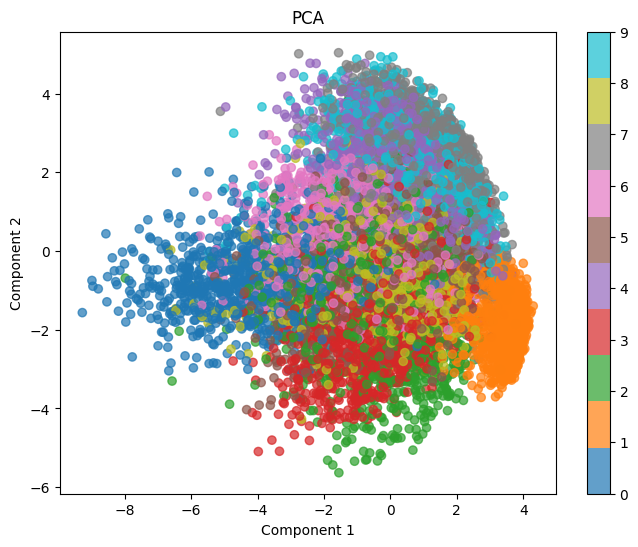

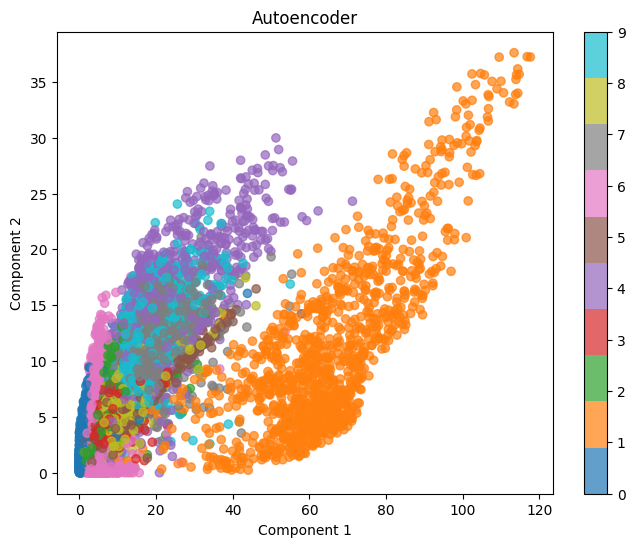

In [18]:
def plot_reduced_data(X, y, title):
 plt.figure(figsize=(8, 6))
 scatter = plt.scatter(X, y, c = Y_test, cmap='tab10', alpha=0.7)
 plt.colorbar(scatter, ticks=range(10))
 plt.title(title)
 plt.xlabel("Component 1")
 plt.ylabel("Component 2")
 plt.show()
    
# Plot PCA results
plot_reduced_data(X_test_pca[:,0], X_test_pca[:,1], "PCA")
# Plot Autoencoder results
plot_reduced_data(X_test_enc[:,0],X_test_enc[:,1], "Autoencoder")